# 18_1.AB test


## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.교차분석

### 2.1 데이터 프레임으로 저장

In [3]:
abch_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/18_2.ABTest(CH).csv', encoding="cp949")
abch_df.head()

,그룹,Clicks,관측치1,Enrollments,관측치2
0,1,1,22859,1,4836
1,1,2,255742,2,273765
2,2,1,34023,1,6683
3,2,2,310637,2,337977


In [4]:
abch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   그룹           4 non-null      int64
 1   Clicks       4 non-null      int64
 2   관측치1         4 non-null      int64
 3   Enrollments  4 non-null      int64
 4   관측치2         4 non-null      int64
dtypes: int64(5)
memory usage: 288.0 bytes


In [5]:
abch_df['그룹'].replace({1:'A안', 2:'B안'}, inplace=True)
abch_df['Clicks'].replace({1:'Click', 2:'Non_Click'}, inplace=True)
abch_df['Enrollments'].replace({1:'Enrollments', 2:'Non_Enrollments'}, inplace=True)
abch_df['그룹'] = abch_df['그룹'].astype('category')
abch_df['Clicks'] = abch_df['Clicks'].astype('category')
abch_df['Enrollments'] = abch_df['Enrollments'].astype('category')
abch_df

,그룹,Clicks,관측치1,Enrollments,관측치2
0,A안,Click,22859,Enrollments,4836
1,A안,Non_Click,255742,Non_Enrollments,273765
2,B안,Click,34023,Enrollments,6683
3,B안,Non_Click,310637,Non_Enrollments,337977


### 2.2 Clicks(%)

In [6]:
tab = pd.crosstab(abch_df['그룹'],
                  abch_df['Clicks'],
                  values = abch_df['관측치1'],
                  margins = True,
                  aggfunc = 'sum')
tab

Clicks,Click,Non_Click,All
그룹,,,
A안,22859,255742,278601
B안,34023,310637,344660
All,56882,566379,623261


In [7]:
# Pearson
result = sm.stats.Table(tab)
rslt = result.test_nominal_association()
print(rslt)

df          4
pvalue      0.0
statistic   515.9348810835081


### 2.3 Enrollments(%)

In [8]:
tab = pd.crosstab(abch_df['그룹'],
                  abch_df['Enrollments'],
                  values = abch_df['관측치2'],
                  margins = True,
                  aggfunc = 'sum')
tab

Enrollments,Enrollments,Non_Enrollments,All
그룹,,,
A안,4836,273765,278601
B안,6683,337977,344660
All,11519,611742,623261


In [9]:
# Pearson
result = sm.stats.Table(tab)
rslt = result.test_nominal_association()
print(rslt)

df          4
pvalue      4.501337250717441e-07
statistic   35.06657937860307


## 3.비율검정

### 3.1 Clicks(%)

In [10]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([22859, 34023])      # x1, x2
nobs = np.array([278601, 344660])   # n1, n2

z, p = proportions_ztest(count = count,
                         nobs = nobs,
                         value = 0)
print('z : {}, p : {}'.format(z, p))

z : -22.714199987750114, p : 3.2431643422618867e-114


### 4.2 Enrollments(%)

In [11]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([4836, 6683])      # x1, x2
nobs = np.array([278601, 344660])   # n1, n2

z, p = proportions_ztest(count = count,
                         nobs = nobs,
                         value = 0)
print('z : {}, p : {}'.format(z, p))

z : -5.921704094144109, p : 3.1862255504964427e-09


In [12]:
# z2 = ch2
np.sqrt(rslt.statistic)

5.921704094144107

## 4.t-test

### 4.1 데이터 프레임으로 저장

In [13]:
ab_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/18_1.ABTest.csv', encoding="cp949")
ab_df.head()

,그룹,Date,Pageviews,Clicks,Clicks(%),Enrollments,Enrollments(%)
0,1,2024-01-01,"7,723",687,0.089,134,0.017
1,1,2024-01-02,"9,102",779,0.086,147,0.016
2,1,2024-01-03,"10,511",909,0.086,167,0.016
3,1,2024-01-04,"9,871",836,0.085,156,0.016
4,1,2024-01-05,"10,014",837,0.084,163,0.016


In [14]:
ab_df['그룹'].replace({1:'A안', 2:'B안',}, inplace=True)
ab_df['그룹'] = ab_df['그룹'].astype('category')

ab_df.head()

,그룹,Date,Pageviews,Clicks,Clicks(%),Enrollments,Enrollments(%)
0,A안,2024-01-01,"7,723",687,0.089,134,0.017
1,A안,2024-01-02,"9,102",779,0.086,147,0.016
2,A안,2024-01-03,"10,511",909,0.086,167,0.016
3,A안,2024-01-04,"9,871",836,0.085,156,0.016
4,A안,2024-01-05,"10,014",837,0.084,163,0.016


In [15]:
# 분석변수가 여러개 일 때
num_feature = [ 'Clicks(%)', 'Enrollments(%)']
for num in num_feature:
    print("----", num, "----")
    results = ab_df.groupby('그룹')[num].describe().round(4)
    print(results, "\n")

---- Clicks(%) ----
    count    mean     std    min    25%    50%    75%    max
그룹                                                          
A안   30.0  0.0821  0.0034  0.071  0.080  0.083  0.084  0.089
B안   30.0  0.0989  0.0037  0.091  0.096  0.099  0.101  0.109 

---- Enrollments(%) ----
    count    mean     std    min     25%    50%    75%    max
그룹                                                           
A안   30.0  0.0172  0.0027  0.014  0.0152  0.016  0.018  0.024
B안   30.0  0.0197  0.0033  0.015  0.0173  0.019  0.021  0.026 



### 4.2 Clicks(%)

In [16]:
x = ab_df['Clicks(%)'][ab_df['그룹'] == 'A안']
y = ab_df['Clicks(%)'][ab_df['그룹'] == 'B안']

In [17]:
# paired = True : paired sample t-test
# correction = False : 등분산일때
pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-18.32,58,two-sided,0.0,"[-0.02, -0.01]",4.73,2.229e+22,1.0


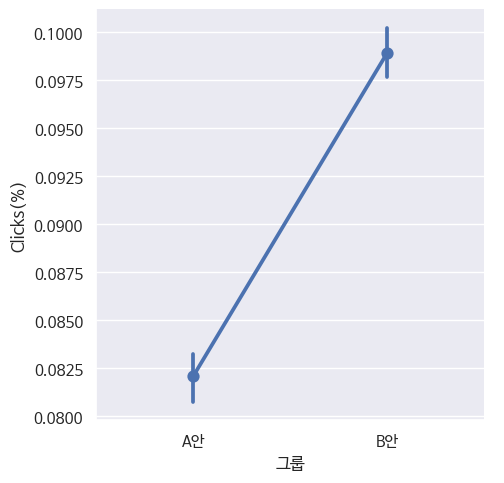

In [18]:
# 그래프
sns.catplot(x = "그룹",
            y = "Clicks(%)",
            kind = "point",
            data = ab_df)
plt.show()

In [19]:
# 등분산이면 지금까지 분석한 것이 문제 없음
pg.homoscedasticity(ab_df,
                    dv = "Clicks(%)",
                    group = "그룹")

,W,pval,equal_var
levene,0.076533,0.783035,True


In [20]:
pg.normality(ab_df,
             dv = 'Clicks(%)',
             group = '그룹')

,W,pval,normal
그룹,,,
A안,0.917436,0.023024,False
B안,0.960252,0.314403,True


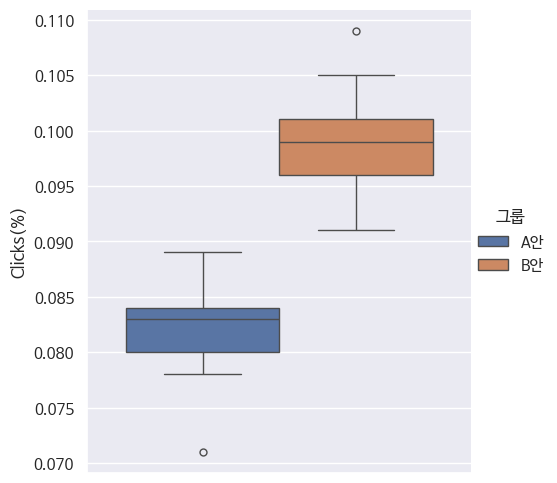

In [21]:
# 한글 폰트 인식
sns.catplot(data = ab_df,
            y = "Clicks(%)",
            hue = "그룹",
            kind = "box")
plt.show()

### 4.3 Enrollments(%)

In [22]:
x = ab_df['Enrollments(%)'][ab_df['그룹'] == 'A안']
y = ab_df['Enrollments(%)'][ab_df['그룹'] == 'B안']

pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.275,58,two-sided,0.002,"[-0.0, -0.0]",0.846,19.065,0.896


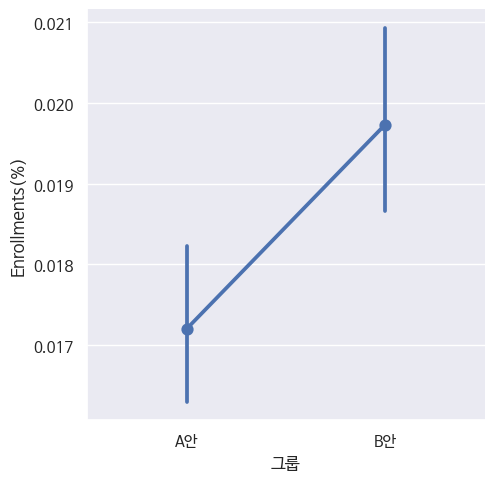

In [23]:
# 그래프
sns.catplot(x = "그룹",
            y = "Enrollments(%)",
            kind = "point",
            data = ab_df)
plt.show()

In [24]:
# 등분산이면 지금까지 분석한 것이 문제 없음
pg.homoscedasticity(ab_df,
                    dv = "Enrollments(%)",
                    group = "그룹")

,W,pval,equal_var
levene,0.817621,0.369617,True


In [25]:
pg.normality(ab_df,
             dv = 'Enrollments(%)',
             group = '그룹')

,W,pval,normal
그룹,,,
A안,0.844781,0.000483,False
B안,0.849501,0.000605,False


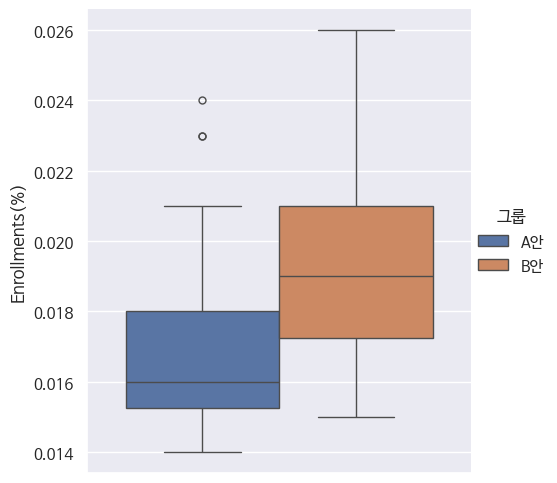

In [26]:
# 한글 폰트 인식
sns.catplot(data = ab_df,
            y = "Enrollments(%)",
            hue = "그룹",
            kind = "box")
plt.show()

In [27]:
# Mann-Whitney U test
pg.mwu(x, y,
       alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,210.5,two-sided,0.000369,0.532222,0.233889
